### Assignment 1 - Data Exploration

In [2]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will explore a dataset about used cars.

1. Import the necessary packages.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

2. Read in the dataset, 'ToyotaCorolla.csv'.
The data set includes sale prices and vehicle characteristics of 1436 used Toyota Corollas. The variables are defined as follows:<br>
a.	Price: sale price in Euros<br>
b.	Age: age in months<br>
c.	KM: accumulated kilometers on odometer<br>
d.	Fuel_type: Fuel type (petrol, diesel, CNG)<br>
e.	HP: horsepower<br>
f.	MetColor: Metallic color (yes=1, no=0)<br>
g.	Automatic: Automatic gear shift (yes=1, no=0)<br>
h.	Doors: Number of doors<br>


In [4]:
df = pd.read_csv("ToyotaCorolla.csv") #df is now a dataframe of Pandas

In [5]:
df.head() #The head() displays a sample of the dataset

,Price,Age,KM,Fuel_Type,HP,MetColor,Automatic,Doors
0,13500,23,46986,Diesel,90,1,0,3
1,13750,23,72937,Diesel,90,1,0,3
2,13950,24,41711,Diesel,90,1,0,3
3,14950,26,48000,Diesel,90,0,0,3
4,13750,30,38500,Diesel,90,0,0,3


In [6]:
df.describe().T # Summary of all the features in the data set

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
MetColor,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0


3. Explore the variable 'Price' using statistics (central tendency and variability) and a graph. Describe your findings.

In [7]:
df['Price'].describe().T #summary of the feature Price

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

<Axes: >

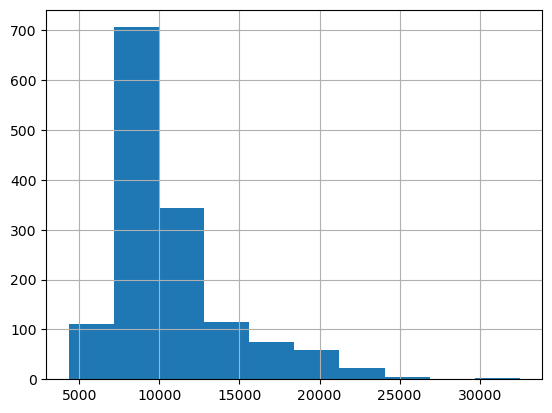

In [8]:
df['Price'].hist() #plotting the historgram of the feature Price

The feature 'Price' has a mean of 10730.824513 and a standard deviation of 3626.964585. There are 1436 rows in the data set and the minimum price is 4350 and the maximum price is 32500. The median of the price is 9900.
From the above histogram, we know that the data is not normally distributed and is slightly right skewed(Positive skew).

<Axes: ylabel='Price'>

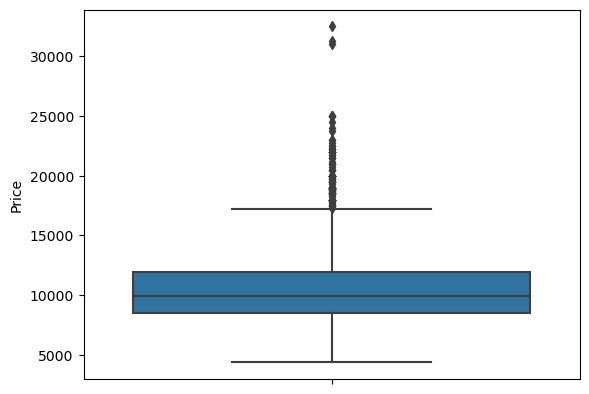

In [9]:
sns.boxplot(y = df['Price']) #plotting the boxplot for feature Price

In [10]:
outliers = np.percentile(df.Price, 75) + 1.5 * ((np.percentile(df.Price, 75)  - np.percentile(df.Price, 25))) #Calculating the outliers

In [11]:
len(df[df['Price'] > outliers])

110

From the above boxplot, we observe that 'Price' feature has outliers towards higher end.

Outliers are calculated using Inter Quartile Range (IQR) method.

Inter Quartile Range is calculated as: Q3-Q1

To find the higher outliers: 
Q3+1.5(IQR)

Using IQR method we found there are 110 outliers in the 'Price' Feature.

4. Explore the variable 'Fuel_type' using statistics and a graph. Describe your findings.

In [12]:
df['Fuel_Type'].value_counts() #value_counts() gives the frequency distribution for categorical variable

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

<Axes: >

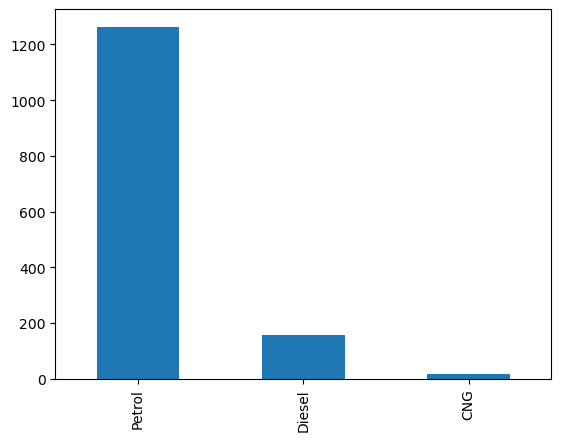

In [13]:
df['Fuel_Type'].value_counts().plot(kind = 'bar') #bar chart for the frequency distribution of Fuel_Type variable

The variable 'Fuel_Type' is a categorical variable. There are 1264 cars having Fuel_Type Petrol, 155 cars with Fuel_Type Diesel, and 17 cars with Fuel_Type CNG. 

5. Explore the relationship between variable 'KM' and 'Price' using statistics and a graph. Describe your findings.

In [14]:
df['KM'].describe() #Summary statistics for variable KM

count      1436.000000
mean      68533.259749
std       37506.448872
min           1.000000
25%       43000.000000
50%       63389.500000
75%       87020.750000
max      243000.000000
Name: KM, dtype: float64

In [15]:
df['Price'].describe() #Summary statistics for variable Price

count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

[Text(0.5, 1.0, 'Relationship between KM and Price')]

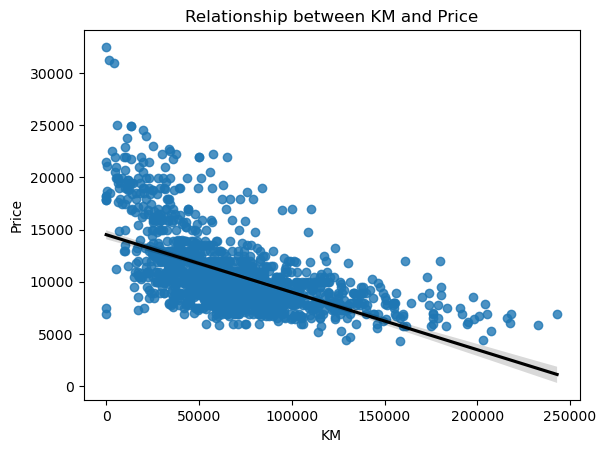

In [25]:
sns.regplot(x = 'KM', y = 'Price', data = df, line_kws = {'color' : 'black'}).set(title='Relationship between KM and Price') #Plotting a scatter plot to show the relationship between KM and Price

We plotted a scatter plot to show the relationship between 'KM' and 'Price'. From the above graph, we can see that as the KM increases, the price of the car decreases.

6. Explore the relationship between variable 'Automatic' and 'Price' using a graph. Describe your findings.

In [17]:
df['Automatic'].value_counts() #value_counts() gives the frequency distribution for categorical variable

0    1356
1      80
Name: Automatic, dtype: int64

[Text(0.5, 1.0, 'Relationship between Automatic and Price')]

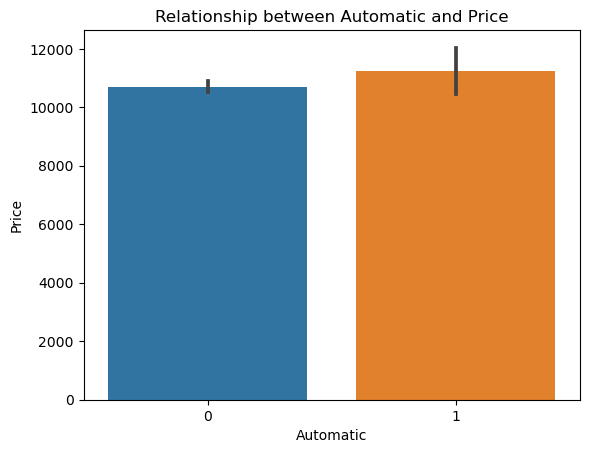

In [18]:
sns.barplot(df, x="Automatic", y="Price").set(title='Relationship between Automatic and Price') #Plotting a bar graph to show the relationship between Automatic and Price

<Axes: xlabel='Automatic', ylabel='Price'>

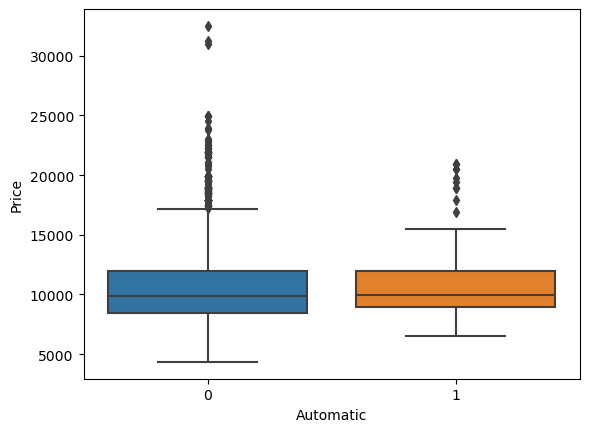

In [19]:
sns.boxplot(y = df['Price'], x = df['Automatic']) #plotting boxplot to check the outliers

We know that 'Automatic' is a categorical varibale and 'Price' is a numerical variable. There are 1356 cars without automatic gear shift and 80 cars with automatic gear shift. From the above graph we can see that the prices of cars with automatic gear shift are higher than without automatic gear shift. 

7. Check the number of unique values of 'Doors'. How many of them? Think about the measurement level of “Doors”. What would you do with this variable?

In [20]:
df['Doors'].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

There are four types of doors in the data set, The frequecy of each type is shown in the above cell output

As we can see the feature 'Doors' is categorical type.

We use 'One Hot encoding' technique for the feature doors.

In [22]:
df['Doors'].unique() #unique values of doors

array([3, 5, 4, 2], dtype=int64)